In [1]:
using BenchmarkTools
using LightGraphs
using PyPlot

## Task #1: 
* what is the output of each loop ? </br>


* How could you change the second loop to result in the same output as the first loop ?

In [2]:
adjL=[[2],
    [3,4,5],
    [1,5],
    [5,6],
    Int[],
    [5],
    [3,5]
]

for a in adjL
    println(a);
end

for i =1:length(adjL)
    println(i);
end


[2]
[3,4,5]
[1,5]
[5,6]
Int64[]
[5]
[3,5]
1
2
3
4
5
6
7


In [3]:
#---------------------Answer
#-----------------------------------------------------
for i =1:length(adjL)
    println(adjL[i])
end

[2]
[3,4,5]
[1,5]
[5,6]
Int64[]
[5]
[3,5]


## Task #2: 
* Represent the network in "Lab_3_data.csv" as adjacency list 

<font color="red"> *Hint: Use type "Arc" below* </font>



In [4]:
type Arc
    to::Int
    flow::Int
end 


In [ ]:
#---------------------Answer
#-----------------------------------------------------
data=readcsv("/data/Lab_3_data.csv",Int)
n=maximum(data[:,1:2])
m=size(data,1)
#print(size(data,1))
adjL=Array(Array{Arc},n)
for i=1:n adjL[i]=[] end

for i =1:m
    a,b,c=data[i,:]
    push!(adjL[a],Arc(b,c))
end
adjL

## Task #3: 
* what does this function do ?

In [6]:
function graphGen(num_nodes,min_out_degree::Int,max_out_degree::Int)
    adjL=Array{Array{Int}}(num_nodes)
    for i=1:num_nodes
        cut_position=rand(min_out_degree:max_out_degree)
        adjL[i]=randperm(num_nodes)[1:cut_position]
    end
    return adjL
end

# generates a random network with a mam and min number of arcs eminating from each node

graphGen (generic function with 1 method)

In [7]:
rand(5:10)
z=randperm(5)
x=z[1:3]

3-element Array{Int64,1}:
 4
 2
 5

## Task #4: 

* Given the following code that make "graph search" using "find_admissible" function.. what does function "compare" do ?

<font color="red"> *Hint: You don't have to check the find_admissble and graph_search functions -- ONLY check "dfs_lightgraphs" and "compare" functions to answer the question* </font>

In [8]:
function find_addmissable!(L,marked_list,currentArc,tail)
    for i=currentArc[tail]:length(L[tail]) 
        head=L[tail][i]
        if !marked_list[head]
            currentArc[tail]=i+1 # We modify the currentArc
            return head
        end
    end
    return -1 # Special value to indicate no addmissable arc 
end


function graph_search(s,aL,isDepth::Bool=true)
    # Initialization
    n=length(aL) #number of nodes 
    pred=zeros(Int,n)
    marked=falses(n) #CHANGED 
    marked[s]=true # ADDED 
    currentArc=ones(Int,n) # ADDED 
    List=Int[s]
    # Now I can stard doing the actual work 
    while !isempty(List)
        i=isDepth? List[end]:List[1] #This is the current node
        j=find_addmissable!(aL,marked,currentArc,i) #Changed 
        if j>0 # We found an addmissable arc 
            marked[j]=true
            pred[j]=i
            push!(List,j)
        else
            isDepth? pop!(List):shift!(List)
        end
    end
    pred
end


graph_search (generic function with 2 methods)

In [9]:
function construct_graph_lightGraphs(adjL)
    g=DiGraph(length(adjL))
    for i=1:length(adjL)
        for j in adjL[i]
            add_edge!(g,i,j)
        end
    end
    g
    #dfs_tree(g,start_node)
end

construct_graph_lightGraphs (generic function with 1 method)

In [10]:
function compare(number_of_iterations,step_nodes,step_edges,start_node)
    our_running_times=zeros(number_of_iterations)
    library_running_times=zeros(number_of_iterations)
    networkSize=zeros(number_of_iterations)
    nodes=0
    min_out_degree = 0
    max_out_degree = 2
    for i = 1:number_of_iterations
        nodes += step_nodes
        min_out_degree += step_edges
        max_out_degree += step_edges
        
        networkSize[i]=nodes  
        
        adj_list=graphGen(nodes,min_out_degree,max_out_degree)
        g = construct_graph_lightGraphs(adj_list)
        
        
        #t1=@benchmark graph_search($start_node,$adj_list,true)
        #t2=@benchmark dfs_tree($g,$start_node)
        t1=@timed graph_search(start_node,adj_list,true)
        t2=@timed dfs_tree(g,start_node)
        
        
        our_running_times[i] =t1[2]   #mean(t1.times)
        library_running_times[i] =t2[2] #mean(t2.times)
    end
    networkSize, our_running_times,library_running_times
end

compare (generic function with 1 method)

In [11]:
@timed(10^6)

(1000000,1.8948e-5,7920,0.0,Base.GC_Diff(7920,0,0,131,0,0,0,0,0))

In [12]:
number_of_iterations=5
step_nodes=1000
step_edges = 400
start_node=5
networkSize, our_running_times,library_running_times = compare(number_of_iterations,step_nodes,step_edges,start_node)

([1000.0,2000.0,3000.0,4000.0,5000.0],[0.00125928,0.00584873,0.0118913,0.0274013,0.0306644],[0.0685449,0.0707855,0.174425,0.2575,0.471715])

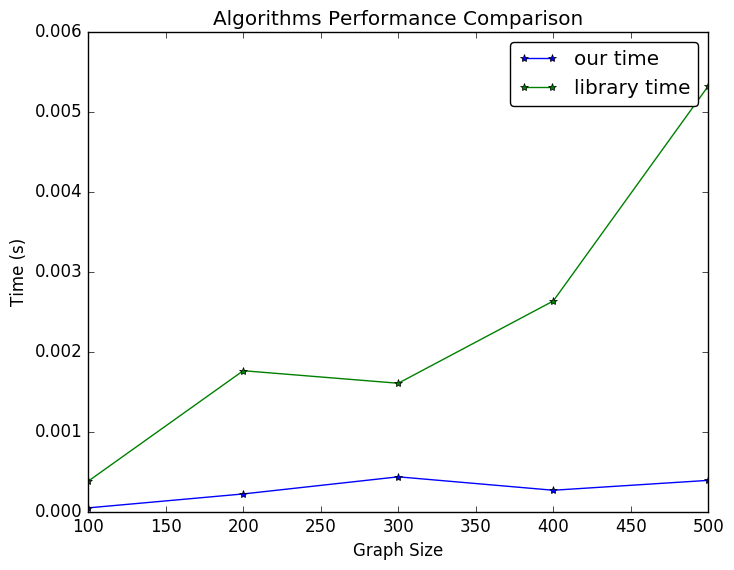

PyObject <matplotlib.text.Text object at 0x000000001C339470>

  likely near C:\Users\Sahrour\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Sahrour\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Sahrour\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Sahrour\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Sahrour\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Sahrour\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Sahrour\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Sahrour\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Sahrour\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Sahrour\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Sahrour\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Sahrour\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Sahrour\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Sahrour\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Sahrour\.julia\v0.5\IJulia\src\kernel.jl:31
i

In [13]:
# ------------- Plotting
#-----------------------------------------------
number_of_iterations =5
step_nodes =100
step_edges =40
start_node =2

networkSize, our_running_times,library_running_times= compare(number_of_iterations,step_nodes,step_edges,start_node)


plot(networkSize, our_running_times, marker="*", label="our time")
plot(networkSize, library_running_times, marker="*", label="library time")
xlabel("Graph Size")
ylabel("Time (s)")
legend(loc="upper right",fancybox="true")
title("Algorithms Performance Comparison")

* Check the effect of increasing the number of arcs only on the running time of both algorithms.


* Check the effect of increasing the number of nodes only on the running time of both algorithms.